# Carhart Factor Model: Understanding Momentum #

In [95]:
# Import Libraries

# Data Management
import pandas as pd

# Plots
import matplotlib.pyplot as plt

# Handle Files
import sys
import os

# Import Local Functions
sys.path.append(os.path.abspath("../source"))
from data_downloader import get_market_data
from other_data_functions import rolling_calc_rstr

In [96]:
# We can download the premiums in the Fama and French website
momemtum_df = pd.read_csv(r'..\additional_data\ff_momentum.csv')
momemtum_df.set_index('date', inplace=True)
momemtum_df.index = pd.to_datetime(momemtum_df.index)
momemtum_df = momemtum_df.loc['2000':]
momemtum_df = momemtum_df['wml']
momemtum_df.name = 'momentum'

momemtum_df

date
2000-01-03   -0.0006
2000-01-04   -0.0191
2000-01-05   -0.0049
2000-01-06   -0.0149
2000-01-07    0.0059
               ...  
2024-12-24    0.0067
2024-12-26    0.0000
2024-12-27   -0.0085
2024-12-30    0.0009
2024-12-31   -0.0107
Name: momentum, Length: 6289, dtype: float64

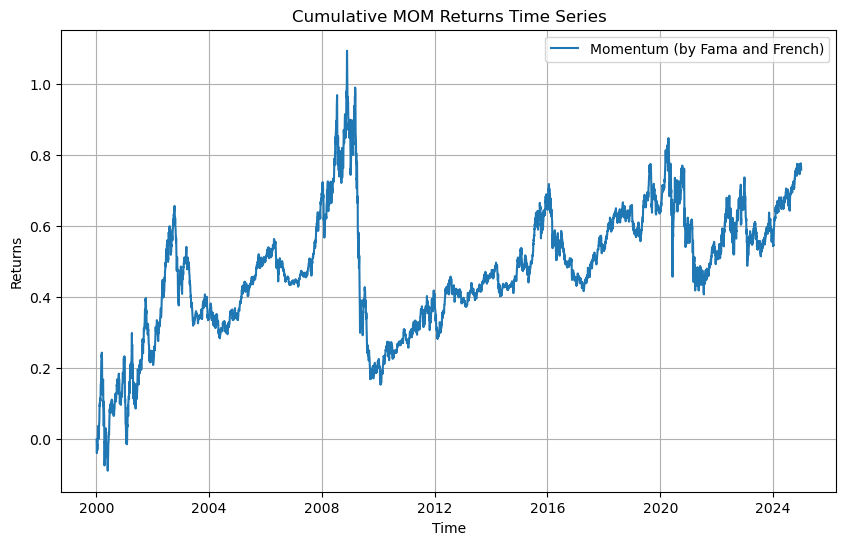

In [97]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(momemtum_df.cumsum(), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative MOM Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

In [98]:
# Let us use an ETF
momentum_etf = get_market_data(
    ticker='MTUM', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

momentum_etf

Price,close,high,low,open,volume,returns
Date,,,,,,
2015-01-05,59.116478,59.610068,59.010706,59.610068,27400,-0.013035
2015-01-06,58.614040,59.513080,58.349613,59.389682,73600,-0.008535
2015-01-07,59.583626,59.742281,59.142918,59.275132,193100,0.016407
2015-01-08,60.799976,60.879300,60.094842,60.218240,109000,0.020209
2015-01-09,60.482651,61.090822,60.271106,61.090822,46900,-0.005233
...,...,...,...,...,...,...
2024-12-24,211.647858,211.707578,209.557552,209.925838,400400,0.012779
2024-12-26,211.946472,212.444163,210.423540,210.911283,365600,0.001410
2024-12-27,209.378403,210.801790,208.054544,210.801790,758600,-0.012191


In [99]:
# Calling Benchmark
benchmark = get_market_data(
    ticker='^GSPC', 
    start_date='2015-01-01', 
    end_date='2025-01-01', 
    returns=True
)

benchmark

Price,close,high,low,open,volume,returns
Date,,,,,,
2015-01-05,2020.579956,2054.439941,2017.339966,2054.439941,3799120000,-0.018447
2015-01-06,2002.609985,2030.250000,1992.439941,2022.150024,4460110000,-0.008933
2015-01-07,2025.900024,2029.609985,2005.550049,2005.550049,3805480000,0.011563
2015-01-08,2062.139893,2064.080078,2030.609985,2030.609985,3934010000,0.017730
2015-01-09,2044.810059,2064.429932,2038.329956,2063.449951,3364140000,-0.008439
...,...,...,...,...,...,...
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,0.010982
2024-12-26,6037.589844,6049.750000,6007.370117,6024.970215,2904530000,-0.000406
2024-12-27,5970.839844,6006.169922,5932.950195,6006.169922,3159610000,-0.011117


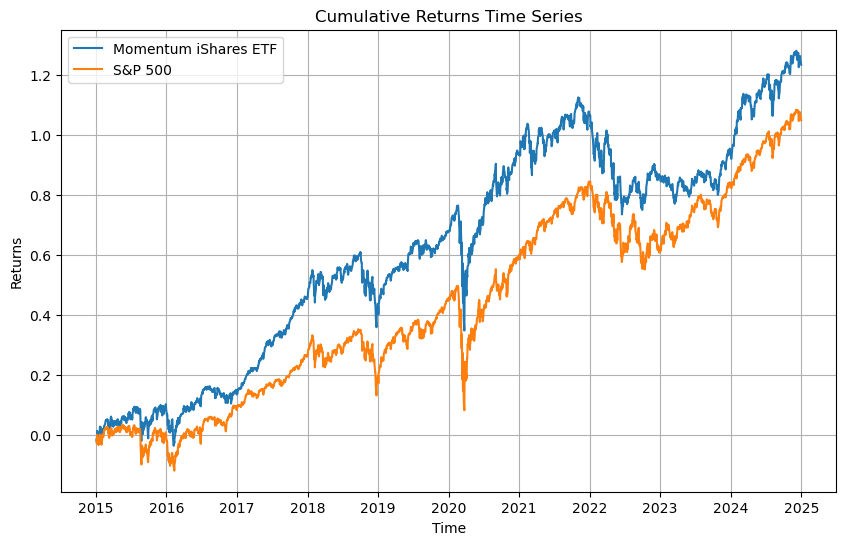

In [100]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(momentum_etf['returns'].cumsum(), label='Momentum iShares ETF', alpha=1)
plt.plot(benchmark['returns'].cumsum(), label='S&P 500', alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

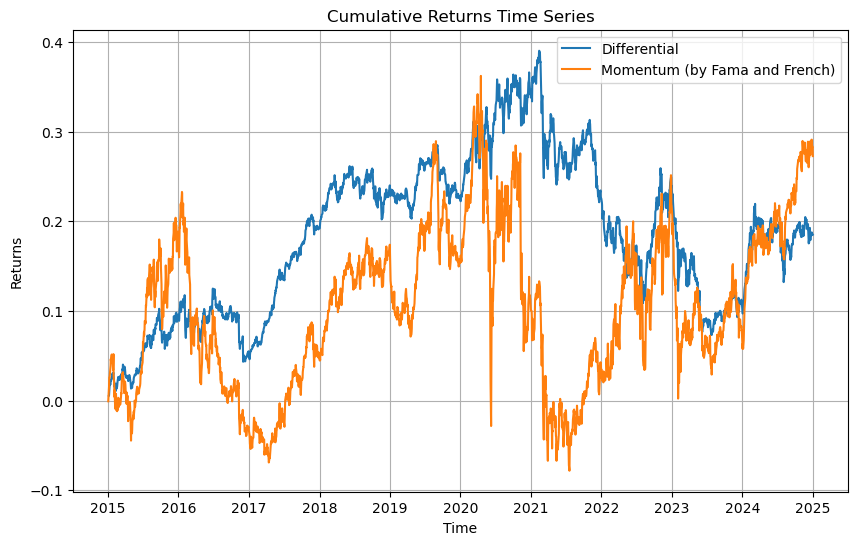

In [101]:
# Calculate Differential
differential = momentum_etf['returns'] - benchmark['returns']

# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(differential.cumsum(), label='Differential', alpha=1)
plt.plot(momemtum_df.loc['2015':].cumsum(), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Cumulative Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend()
plt.grid()

# Show
plt.show()

### Creating a Portfolio for Momentum ###

Using ETFs is not the ideal option in this case, but momentum can be calculated using just price data. So, let’s give it a try:

In [102]:
# Import Data
returns = pd.read_csv(r'..\additional_data\stocks_returns.csv')
returns.set_index('Date', inplace=True)
returns.index = pd.to_datetime(returns.index)
returns = returns.dropna(axis=1)

returns

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-05,0.048789,0.001281,-0.039193,-0.021506,0.028632,0.003752,-0.009288,-0.001397,-0.008823,-0.002625,...,-0.003578,0.008733,0.044314,0.002275,-0.008643,0.009709,0.018928,0.019293,0.016878,-0.003114
1999-01-06,-0.036742,-0.007712,0.000000,-0.036462,0.023906,0.007463,0.023060,0.020735,-0.001478,0.007853,...,0.001790,0.008658,0.113257,0.004535,0.039154,0.009615,0.019087,0.015170,0.002090,0.001039
1999-01-07,0.074963,-0.012987,-0.005831,0.020998,-0.023906,-0.003724,0.016579,-0.001373,-0.008916,-0.009168,...,0.000000,0.003688,-0.018392,-0.004535,-0.001670,-0.002395,-0.004610,-0.005031,0.022705,-0.007295
1999-01-08,0.000000,-0.003929,-0.005865,0.014185,-0.030708,-0.007491,-0.010519,0.000000,-0.008995,-0.003955,...,-0.008984,0.083529,0.047556,-0.006841,-0.005870,-0.012063,-0.004631,0.002519,0.104544,0.002090
1999-01-11,0.019256,-0.013211,-0.048202,0.003834,-0.002082,-0.003766,-0.010631,-0.029270,-0.021310,-0.001322,...,0.005400,0.000000,-0.040638,-0.023150,-0.042085,-0.032062,0.014337,0.026073,-0.045120,-0.027515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.011413,0.003929,0.006278,0.002683,0.014781,0.004355,0.007822,0.012494,0.013291,-0.005291,...,0.009663,0.006390,0.018946,0.007210,0.000940,-0.002642,-0.023556,0.008480,0.012187,0.010791
2024-12-26,0.003171,0.004434,0.002802,0.004944,-0.000138,-0.000395,0.002594,-0.003159,-0.002203,-0.003362,...,0.001981,-0.003190,-0.030811,-0.000440,0.000845,0.013663,-0.006522,0.007380,0.003559,0.006889
2024-12-27,-0.013331,-0.002432,-0.006369,-0.008208,-0.004919,-0.000593,-0.003539,-0.008999,-0.006305,0.004876,...,-0.000630,-0.006410,0.004506,-0.000587,-0.000094,-0.003163,-0.002183,-0.005678,-0.019799,-0.012179


In [103]:
# Import the Alphas
alphas = pd.read_csv(r'..\additional_data\capm_ralpha.csv')
alphas.set_index('Date', inplace=True)
alphas.index = pd.to_datetime(alphas.index)
alphas = alphas[returns.columns]

alphas

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.004124,-0.002341,-0.002562,0.002861,0.004468,-0.001483,0.000701,0.000090,-0.001362,-0.001715,...,-0.001327,0.000909,0.001115,-0.001725,-0.000200,-0.000833,-0.004972,-0.002135,0.002072,-0.001188
2000-01-04,0.003760,-0.002196,-0.002559,0.002539,0.004411,-0.001399,0.000997,-0.000070,-0.001243,-0.001491,...,-0.001184,0.000747,0.000932,-0.001422,-0.000160,-0.000660,-0.005076,-0.002140,0.002164,-0.001284
2000-01-05,0.003944,-0.002158,-0.001900,0.002760,0.004483,-0.001509,0.000899,-0.000563,-0.000951,-0.001223,...,-0.001209,0.001117,0.000818,-0.001140,0.000172,-0.000536,-0.004695,-0.002105,0.002304,-0.001266
2000-01-06,0.003109,-0.001882,-0.001953,0.002753,0.004286,-0.001461,0.000952,-0.001025,-0.000960,-0.001162,...,-0.001280,0.001432,0.000884,-0.001197,0.000536,-0.000525,-0.004822,-0.002153,0.001835,-0.001152
2000-01-07,0.003157,-0.001976,-0.001558,0.002828,0.004282,-0.001416,0.000983,-0.000399,-0.000887,-0.001112,...,-0.001207,0.000958,0.000861,-0.001226,0.000434,-0.000606,-0.004779,-0.002387,0.001439,-0.001288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.000759,0.000066,-0.000144,-0.002482,-0.001130,-0.001651,0.000586,-0.000010,0.001052,0.000312,...,-0.000681,-0.001400,-0.002561,0.000844,-0.000473,-0.003213,-0.003158,-0.000326,0.000478,0.000056
2024-12-26,0.000793,0.000096,-0.000109,-0.002416,-0.001122,-0.001664,0.000595,-0.000036,0.001037,0.000276,...,-0.000668,-0.001423,-0.002781,0.000829,-0.000467,-0.003104,-0.003188,-0.000268,0.000475,0.000087
2024-12-27,0.000762,0.000080,-0.000112,-0.002341,-0.001006,-0.001618,0.000616,0.000015,0.000987,0.000306,...,-0.000595,-0.001420,-0.002655,0.000820,-0.000438,-0.003064,-0.003103,-0.000279,0.000424,0.000133


In [104]:
# Calculate the relative strength 
relative_strenght_long = rolling_calc_rstr(
    returns,
    window_size=252,
    half_life=126
).T

relative_strenght_short = rolling_calc_rstr(
    returns,
    window_size=28,
    half_life=14,
    min_obs=13
).T

In [105]:
# Calculate the Relative Strenght
relative_strenght = (relative_strenght_long - relative_strenght_short)
relative_strenght = relative_strenght.loc[alphas.index]

relative_strenght

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.049162,-0.273533,-0.496596,0.993185,0.898962,-0.165685,0.312759,-0.065674,-0.198976,-0.311521,...,-0.100847,0.225894,0.207284,-0.268288,0.135598,-0.073819,-1.070427,-0.298179,0.741503,0.093049
2000-01-04,1.038036,-0.289635,-0.499434,0.983142,0.900545,-0.188093,0.307588,-0.030488,-0.206123,-0.311109,...,-0.107190,0.224120,0.191924,-0.274293,0.126390,-0.081958,-1.090723,-0.318839,0.710192,0.073027
2000-01-05,1.061009,-0.284312,-0.504859,0.987778,0.906873,-0.192824,0.304542,0.003242,-0.206486,-0.310841,...,-0.108094,0.221968,0.141193,-0.273018,0.112431,-0.089176,-1.094297,-0.341094,0.712548,0.062233
2000-01-06,1.021582,-0.287786,-0.499517,0.957887,0.937886,-0.203642,0.296841,-0.021740,-0.202814,-0.304705,...,-0.114299,0.218991,0.153036,-0.266546,0.108348,-0.097298,-1.086753,-0.341497,0.705904,0.054102
2000-01-07,1.011020,-0.276987,-0.490089,0.927801,0.956577,-0.206882,0.294489,0.003201,-0.206167,-0.311142,...,-0.120001,0.186345,0.138911,-0.262339,0.122586,-0.071582,-1.090227,-0.343597,0.639937,0.033843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.261789,0.083858,0.147268,-0.130709,0.041121,-0.269309,0.301200,0.321265,0.302675,0.133524,...,-0.018374,-0.084670,-0.233138,0.254899,0.084183,-0.691446,-0.683457,0.044126,0.416235,0.427462
2024-12-26,0.273995,0.079661,0.141586,-0.140513,0.036985,-0.270087,0.287443,0.304456,0.294848,0.131098,...,-0.028261,-0.093615,-0.263155,0.252888,0.077280,-0.677070,-0.671003,0.047976,0.396769,0.410631
2024-12-27,0.271043,0.080349,0.146859,-0.169476,0.024247,-0.262061,0.280691,0.290289,0.301387,0.140316,...,-0.057637,-0.099274,-0.281116,0.255527,0.068919,-0.663087,-0.664298,0.035112,0.383083,0.407546


In [106]:
# Now we are going to z-score them
def standardize_zscore(
        variable: pd.DataFrame
) -> pd.DataFrame:
    # Calculate Mean
    mean = variable.mean(axis=1)
    
    # Calculate Cross-Sectional Standard Deviation
    std = variable.std(axis=1)
    
    # Standardize (broadcasting Series across DataFrame rows)
    zscore_df = (variable.subtract(mean, axis = 0)).divide(std, axis = 0)
    
    return zscore_df

In [107]:
# Z-Score Alphas
zscore_alphas = standardize_zscore(alphas)

zscore_alphas

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2.071532,-0.889233,-0.990522,1.493235,2.229249,-0.496437,0.503814,0.224047,-0.441227,-0.602553,...,-0.425031,0.599112,0.693319,-0.607108,0.091213,-0.198862,-2.094322,-0.794898,1.131931,-0.361481
2000-01-04,1.953423,-0.845626,-1.016248,1.379642,2.259554,-0.470963,0.654937,0.153414,-0.397710,-0.514418,...,-0.370109,0.537658,0.624570,-0.481746,0.111218,-0.123607,-2.199190,-0.819293,1.203615,-0.417165
2000-01-05,2.068165,-0.858640,-0.735058,1.500240,2.326379,-0.547478,0.607707,-0.093484,-0.279735,-0.410311,...,-0.403495,0.712138,0.568741,-0.370380,0.258791,-0.080712,-2.075257,-0.833282,1.281554,-0.430859
2000-01-06,1.729639,-0.788293,-0.823900,1.550426,2.323556,-0.575625,0.641742,-0.355598,-0.323142,-0.424960,...,-0.484373,0.883762,0.607540,-0.442675,0.431820,-0.103588,-2.271364,-0.924784,1.087154,-0.419992
2000-01-07,1.694741,-0.841144,-0.634609,1.532247,2.250841,-0.564097,0.621009,-0.061796,-0.302814,-0.414003,...,-0.461283,0.608479,0.560764,-0.470213,0.349610,-0.163963,-2.225945,-1.044044,0.845932,-0.500963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.889965,0.379285,0.224664,-1.497933,-0.501689,-0.886005,0.762243,0.323047,1.105774,0.560253,...,-0.171429,-0.700518,-1.556484,0.952354,-0.018167,-2.036795,-1.996035,0.090621,0.682608,0.371726
2024-12-26,0.920560,0.399059,0.245182,-1.482437,-0.513668,-0.919357,0.772318,0.299754,1.103612,0.533473,...,-0.173017,-0.739032,-1.755628,0.947894,-0.022775,-1.997642,-2.060703,0.126039,0.682831,0.391933
2024-12-27,0.899728,0.380294,0.234039,-1.464914,-0.447025,-0.914190,0.788949,0.330566,1.071405,0.552321,...,-0.133930,-0.762969,-1.704536,0.944307,-0.014639,-2.016112,-2.045868,0.106757,0.642123,0.420937


In [108]:
# Z-Score Relative Strenght
zscore_rstr = standardize_zscore(relative_strenght)

zscore_rstr

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2.218437,-0.606868,-1.083336,2.098869,1.897605,-0.376503,0.645464,-0.162877,-0.447613,-0.688012,...,-0.238008,0.459918,0.420168,-0.595666,0.267044,-0.180275,-2.309052,-0.659513,1.561271,0.176159
2000-01-04,2.212522,-0.626619,-1.075261,2.095134,1.918507,-0.409477,0.650504,-0.072449,-0.448034,-0.672541,...,-0.236471,0.472014,0.403164,-0.593812,0.263025,-0.182515,-2.339695,-0.689069,1.511447,0.148910
2000-01-05,2.274968,-0.599220,-1.070404,2.118514,1.945667,-0.403763,0.658827,0.015119,-0.432950,-0.655897,...,-0.222742,0.482412,0.309842,-0.575092,0.248394,-0.182325,-2.329699,-0.720531,1.530503,0.141150
2000-01-06,2.196635,-0.614114,-1.068625,2.059905,2.016970,-0.433487,0.640873,-0.043007,-0.431709,-0.650432,...,-0.241698,0.473757,0.332175,-0.568518,0.236246,-0.205204,-2.329213,-0.729412,1.518987,0.119799
2000-01-07,2.193278,-0.584279,-1.043828,2.013819,2.075874,-0.433099,0.648097,0.019941,-0.431557,-0.657933,...,-0.245743,0.414887,0.312597,-0.552690,0.277391,-0.141327,-2.338013,-0.727921,1.393047,0.086018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.446637,-0.153666,0.060268,-0.877572,-0.297853,-1.345180,0.579603,0.647297,0.584581,0.013897,...,-0.498576,-0.722246,-1.223147,0.423392,-0.152568,-2.769385,-2.742431,-0.287712,0.967710,1.005586
2024-12-26,0.526830,-0.136080,0.075155,-0.887137,-0.281657,-1.329141,0.572704,0.630738,0.597962,0.039379,...,-0.504225,-0.727160,-1.305494,0.454828,-0.144203,-2.717437,-2.696743,-0.244165,0.945636,0.992920
2024-12-27,0.531579,-0.110976,0.113134,-0.952774,-0.300015,-1.264745,0.564088,0.596428,0.633826,0.091087,...,-0.575927,-0.716224,-1.328952,0.479297,-0.149490,-2.616025,-2.620106,-0.263403,0.909105,0.991534


In [109]:
# Now Join both
momentum = (zscore_alphas + zscore_rstr)/2 

momentum

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2.144985,-0.748051,-1.036929,1.796052,2.063427,-0.436470,0.574639,0.030585,-0.444420,-0.645283,...,-0.331519,0.529515,0.556743,-0.601387,0.179128,-0.189569,-2.201687,-0.727206,1.346601,-0.092661
2000-01-04,2.082973,-0.736122,-1.045754,1.737388,2.089030,-0.440220,0.652721,0.040483,-0.422872,-0.593480,...,-0.303290,0.504836,0.513867,-0.537779,0.187121,-0.153061,-2.269443,-0.754181,1.357531,-0.134128
2000-01-05,2.171567,-0.728930,-0.902731,1.809377,2.136023,-0.475621,0.633267,-0.039183,-0.356342,-0.533104,...,-0.313119,0.597275,0.439291,-0.472736,0.253593,-0.131518,-2.202478,-0.776906,1.406028,-0.144854
2000-01-06,1.963137,-0.701203,-0.946262,1.805165,2.170263,-0.504556,0.641308,-0.199303,-0.377426,-0.537696,...,-0.363035,0.678759,0.469857,-0.505596,0.334033,-0.154396,-2.300289,-0.827098,1.303070,-0.150096
2000-01-07,1.944010,-0.712712,-0.839218,1.773033,2.163357,-0.498598,0.634553,-0.020928,-0.367185,-0.535968,...,-0.353513,0.511683,0.436680,-0.511452,0.313501,-0.152645,-2.281979,-0.885982,1.119489,-0.207472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.668301,0.112810,0.142466,-1.187753,-0.399771,-1.115592,0.670923,0.485172,0.845178,0.287075,...,-0.335002,-0.711382,-1.389815,0.687873,-0.085367,-2.403090,-2.369233,-0.098546,0.825159,0.688656
2024-12-26,0.723695,0.131489,0.160168,-1.184787,-0.397662,-1.124249,0.672511,0.465246,0.850787,0.286426,...,-0.338621,-0.733096,-1.530561,0.701361,-0.083489,-2.357539,-2.378723,-0.059063,0.814233,0.692426
2024-12-27,0.715654,0.134659,0.173587,-1.208844,-0.373520,-1.089467,0.676518,0.463497,0.852616,0.321704,...,-0.354928,-0.739597,-1.516744,0.711802,-0.082064,-2.316068,-2.332987,-0.078323,0.775614,0.706236


In [110]:
# And Z-Score it
zscore_momentum = standardize_zscore(momentum)

zscore_momentum

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2.171605,-0.757334,-1.049797,1.818342,2.089035,-0.441886,0.581770,0.030965,-0.449935,-0.653291,...,-0.335634,0.536087,0.563653,-0.608850,0.181351,-0.191921,-2.229011,-0.736231,1.363313,-0.093811
2000-01-04,2.108618,-0.745185,-1.058629,1.758778,2.114750,-0.445640,0.660757,0.040981,-0.428078,-0.600786,...,-0.307024,0.511051,0.520193,-0.544400,0.189425,-0.154945,-2.297383,-0.763467,1.374244,-0.135779
2000-01-05,2.197856,-0.737754,-0.913660,1.831282,2.161882,-0.481379,0.640934,-0.039657,-0.360656,-0.539558,...,-0.316909,0.604506,0.444609,-0.478459,0.256663,-0.133111,-2.229142,-0.786312,1.423050,-0.146608
2000-01-06,1.990630,-0.711024,-0.959515,1.830446,2.200657,-0.511622,0.650289,-0.202094,-0.382711,-0.545226,...,-0.368119,0.688265,0.476438,-0.512677,0.338711,-0.156558,-2.332504,-0.838681,1.321320,-0.152199
2000-01-07,1.975873,-0.724393,-0.852974,1.802094,2.198816,-0.506770,0.644954,-0.021271,-0.373204,-0.544753,...,-0.359307,0.520070,0.443838,-0.519835,0.318639,-0.155147,-2.319382,-0.900504,1.137838,-0.210873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.684649,0.115569,0.145951,-1.216807,-0.409550,-1.142881,0.687334,0.497040,0.865852,0.294097,...,-0.343197,-0.728783,-1.423812,0.704699,-0.087456,-2.461872,-2.427188,-0.100956,0.845343,0.705501
2024-12-26,0.740808,0.134599,0.163956,-1.212803,-0.407066,-1.150833,0.688413,0.476247,0.870905,0.293199,...,-0.346628,-0.750431,-1.566754,0.717946,-0.085463,-2.413287,-2.434972,-0.060460,0.833487,0.708800
2024-12-27,0.730850,0.137518,0.177272,-1.234512,-0.381451,-1.112601,0.690883,0.473339,0.870720,0.328535,...,-0.362465,-0.755301,-1.548950,0.726916,-0.083807,-2.365247,-2.382525,-0.079986,0.792083,0.721232


### Calculate the Weights ###

In [111]:
# Function to calculate the weights (as we saw above)
def calculate_momentum_weights(
    momentum_series: pd.Series
) -> pd.Series:

    # Ranking Momentum
    ranks = momentum_series.rank()
    z_bar = ranks.mean()
    median_rank = ranks.median()
    
    # Split using the Median
    low_mom = ranks[ranks < median_rank]
    high_mom = ranks[ranks >= median_rank]

    # Calculate Weights
    w_low = (z_bar - low_mom).clip(lower=0)
    w_high = (high_mom - z_bar).clip(lower=0)
    
    # Standardize Weights
    w_low /= w_low.sum()
    w_high /= w_high.sum()
    
    # Concat
    mom_weights = pd.concat([-w_low, w_high])

    return mom_weights

In [112]:
# Let's make a try:
momentum_weights = calculate_momentum_weights(momentum.iloc[0])

momentum_weights

ABT    -0.006088
ACGL   -0.007610
ADM    -0.003678
AEE    -0.003805
AEP    -0.005242
          ...   
WY      0.005242
X       0.005285
XOM     0.002706
ZBRA    0.007779
ZION    0.000254
Name: 2000-01-03 00:00:00, Length: 435, dtype: float64

In [113]:
# Function for the Rolling Weights
def calculate_mom_rolling_weights(
    mom_df, 
    rebalance_days=21
):
    # Rebalancing Dates
    rebalance_dates = mom_df.index[::rebalance_days]

    # List used for storing
    weights_list = []

    # Loop
    for date in rebalance_dates:
        # Betas for each date
        momentum_today = mom_df.loc[date]
        
        # Calculate Weights and store them
        weights = calculate_momentum_weights(momentum_today)
        weights.name = date
        weights_list.append(weights)

    # Create a DataFrame
    mom_weights_rebalance = pd.DataFrame(weights_list)

    # Reindexing for daily weights
    mom_weights_daily = mom_weights_rebalance.reindex(mom_df.index)

    # Forward Fill
    mom_weights_daily = mom_weights_daily.ffill().fillna(0)

    # Reindexing Columns to have consistency
    mom_weights_daily = mom_weights_daily.reindex(columns=mom_df.columns).fillna(0)

    return mom_weights_daily

In [114]:
# Get the Weights
mom_daily_weights = calculate_mom_rolling_weights(zscore_momentum, rebalance_days=21)

mom_daily_weights

,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WST,WY,X,XEL,XOM,XRAY,XRX,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0.008625,-0.006088,-0.007610,0.008329,0.008582,-0.003678,0.005369,0.001564,-0.003805,-0.005242,...,-0.002494,0.005242,0.005285,-0.004989,0.002706,-0.000846,-0.009005,-0.005792,0.007779,0.000254
2000-01-04,0.008625,-0.006088,-0.007610,0.008329,0.008582,-0.003678,0.005369,0.001564,-0.003805,-0.005242,...,-0.002494,0.005242,0.005285,-0.004989,0.002706,-0.000846,-0.009005,-0.005792,0.007779,0.000254
2000-01-05,0.008625,-0.006088,-0.007610,0.008329,0.008582,-0.003678,0.005369,0.001564,-0.003805,-0.005242,...,-0.002494,0.005242,0.005285,-0.004989,0.002706,-0.000846,-0.009005,-0.005792,0.007779,0.000254
2000-01-06,0.008625,-0.006088,-0.007610,0.008329,0.008582,-0.003678,0.005369,0.001564,-0.003805,-0.005242,...,-0.002494,0.005242,0.005285,-0.004989,0.002706,-0.000846,-0.009005,-0.005792,0.007779,0.000254
2000-01-07,0.008625,-0.006088,-0.007610,0.008329,0.008582,-0.003678,0.005369,0.001564,-0.003805,-0.005242,...,-0.002494,0.005242,0.005285,-0.004989,0.002706,-0.000846,-0.009005,-0.005792,0.007779,0.000254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-24,0.003678,-0.000507,-0.000423,-0.007356,-0.005158,-0.007399,0.004777,0.003382,0.005834,0.001057,...,-0.004904,-0.005200,-0.006807,0.005200,-0.001395,-0.008667,-0.009047,-0.002156,0.005961,0.006130
2024-12-26,0.003678,-0.000507,-0.000423,-0.007356,-0.005158,-0.007399,0.004777,0.003382,0.005834,0.001057,...,-0.004904,-0.005200,-0.006807,0.005200,-0.001395,-0.008667,-0.009047,-0.002156,0.005961,0.006130
2024-12-27,0.003678,-0.000507,-0.000423,-0.007356,-0.005158,-0.007399,0.004777,0.003382,0.005834,0.001057,...,-0.004904,-0.005200,-0.006807,0.005200,-0.001395,-0.008667,-0.009047,-0.002156,0.005961,0.006130


In [115]:
# Calculate the Portfolio using rebalancing
mom_rebalancing_portfolio = (returns.loc[mom_daily_weights.index] * mom_daily_weights).sum(axis = 1)
mom_rebalancing_portfolio.name = 'mom_rebalancing_portfolio'

mom_rebalancing_portfolio

Date
2000-01-03    0.013361
2000-01-04   -0.026164
2000-01-05   -0.012088
2000-01-06   -0.023119
2000-01-07    0.011435
                ...   
2024-12-24    0.004063
2024-12-26   -0.002517
2024-12-27   -0.003523
2024-12-30    0.005508
2024-12-31   -0.010361
Name: mom_rebalancing_portfolio, Length: 6289, dtype: float64

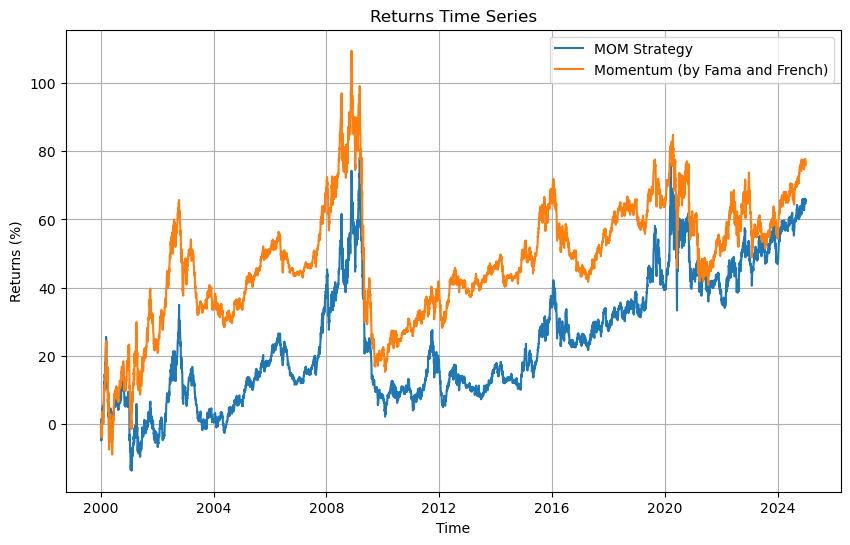

In [116]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(mom_rebalancing_portfolio.cumsum().mul(100), label='MOM Strategy', alpha=1)
plt.plot(momemtum_df.cumsum().mul(100), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 

Once again, we are in the presence of survivorship bias. However, we previously built a portfolio that takes this bias into account.

In [117]:
momentum_realistic_portfolio = pd.read_csv(r'..\additional_data\momentum_portfolio.csv')
momentum_realistic_portfolio.set_index('Date', inplace=True)
momentum_realistic_portfolio.index = pd.to_datetime(momentum_realistic_portfolio.index)

momentum_realistic_portfolio

,portfolio_returns
Date,
2000-01-03,0.013859
2000-01-04,-0.026748
2000-01-05,-0.012554
2000-01-06,-0.023430
2000-01-07,0.011877
...,...
2024-12-24,0.004636
2024-12-26,-0.002000
2024-12-27,-0.003890


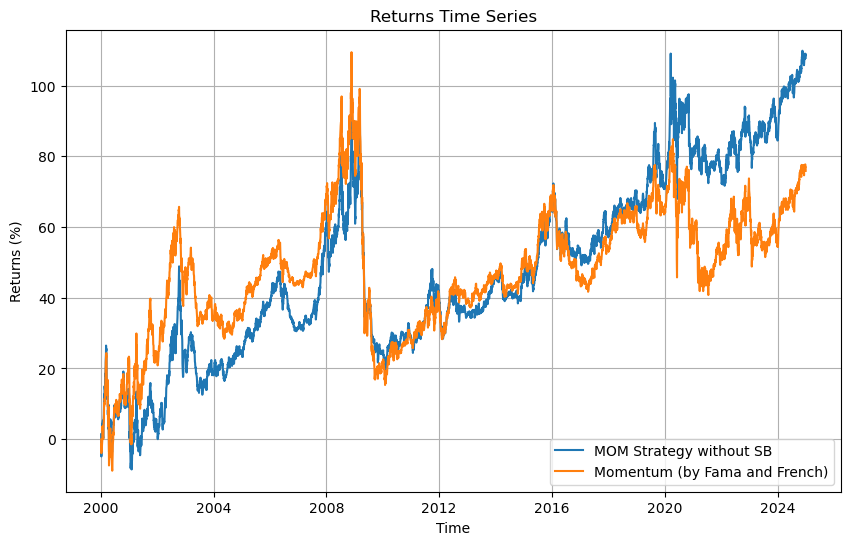

In [118]:
# Create Plot
plt.figure(figsize=(10, 6))
plt.plot(momentum_realistic_portfolio.cumsum().mul(100), label='MOM Strategy without SB', alpha=1)
plt.plot(momemtum_df.cumsum().mul(100), label='Momentum (by Fama and French)', alpha=1)

# Config
plt.title('Returns Time Series')
plt.xlabel('Time')
plt.ylabel('Returns (%)')
plt.legend()
plt.grid()

# Show
plt.show() 